In [8]:
import os
from glob import glob

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import rasterio as rio
from matplotlib import colors

%matplotlib inline


world_clim_tmn_file = "/media/xultaeculcis/2TB/datasets/wc/pre-processed/tmin/resized/4x/wc2.1_2.5m_tmin_2001-01.tif"
world_clim_tmx_file = "/media/xultaeculcis/2TB/datasets/wc/pre-processed/tmax/resized/4x/wc2.1_2.5m_tmax_2001-01.tif"


cruts_inference_tmn_file = (
    "/media/xultaeculcis/2TB/datasets/cruts/inference/tmn/cruts-tmn-2001-01-16.tif"
)
cruts_inference_tmp_file = (
    "/media/xultaeculcis/2TB/datasets/cruts/inference/tmp/cruts-tmp-2001-01-16.tif"
)
cruts_inference_tmx_file = (
    "/media/xultaeculcis/2TB/datasets/cruts/inference/tmx/cruts-tmx-2001-01-16.tif"
)

In [2]:
with rio.open(world_clim_tmn_file) as ds:
    wc_tmn = ds.read(1)

with rio.open(world_clim_tmx_file) as ds:
    wc_tmx = ds.read(1)

with rio.open(cruts_inference_tmn_file) as ds:
    cruts_tmn = ds.read(1)

with rio.open(cruts_inference_tmp_file) as ds:
    cruts_tmp = ds.read(1)

with rio.open(cruts_inference_tmx_file) as ds:
    cruts_tmx = ds.read(1)

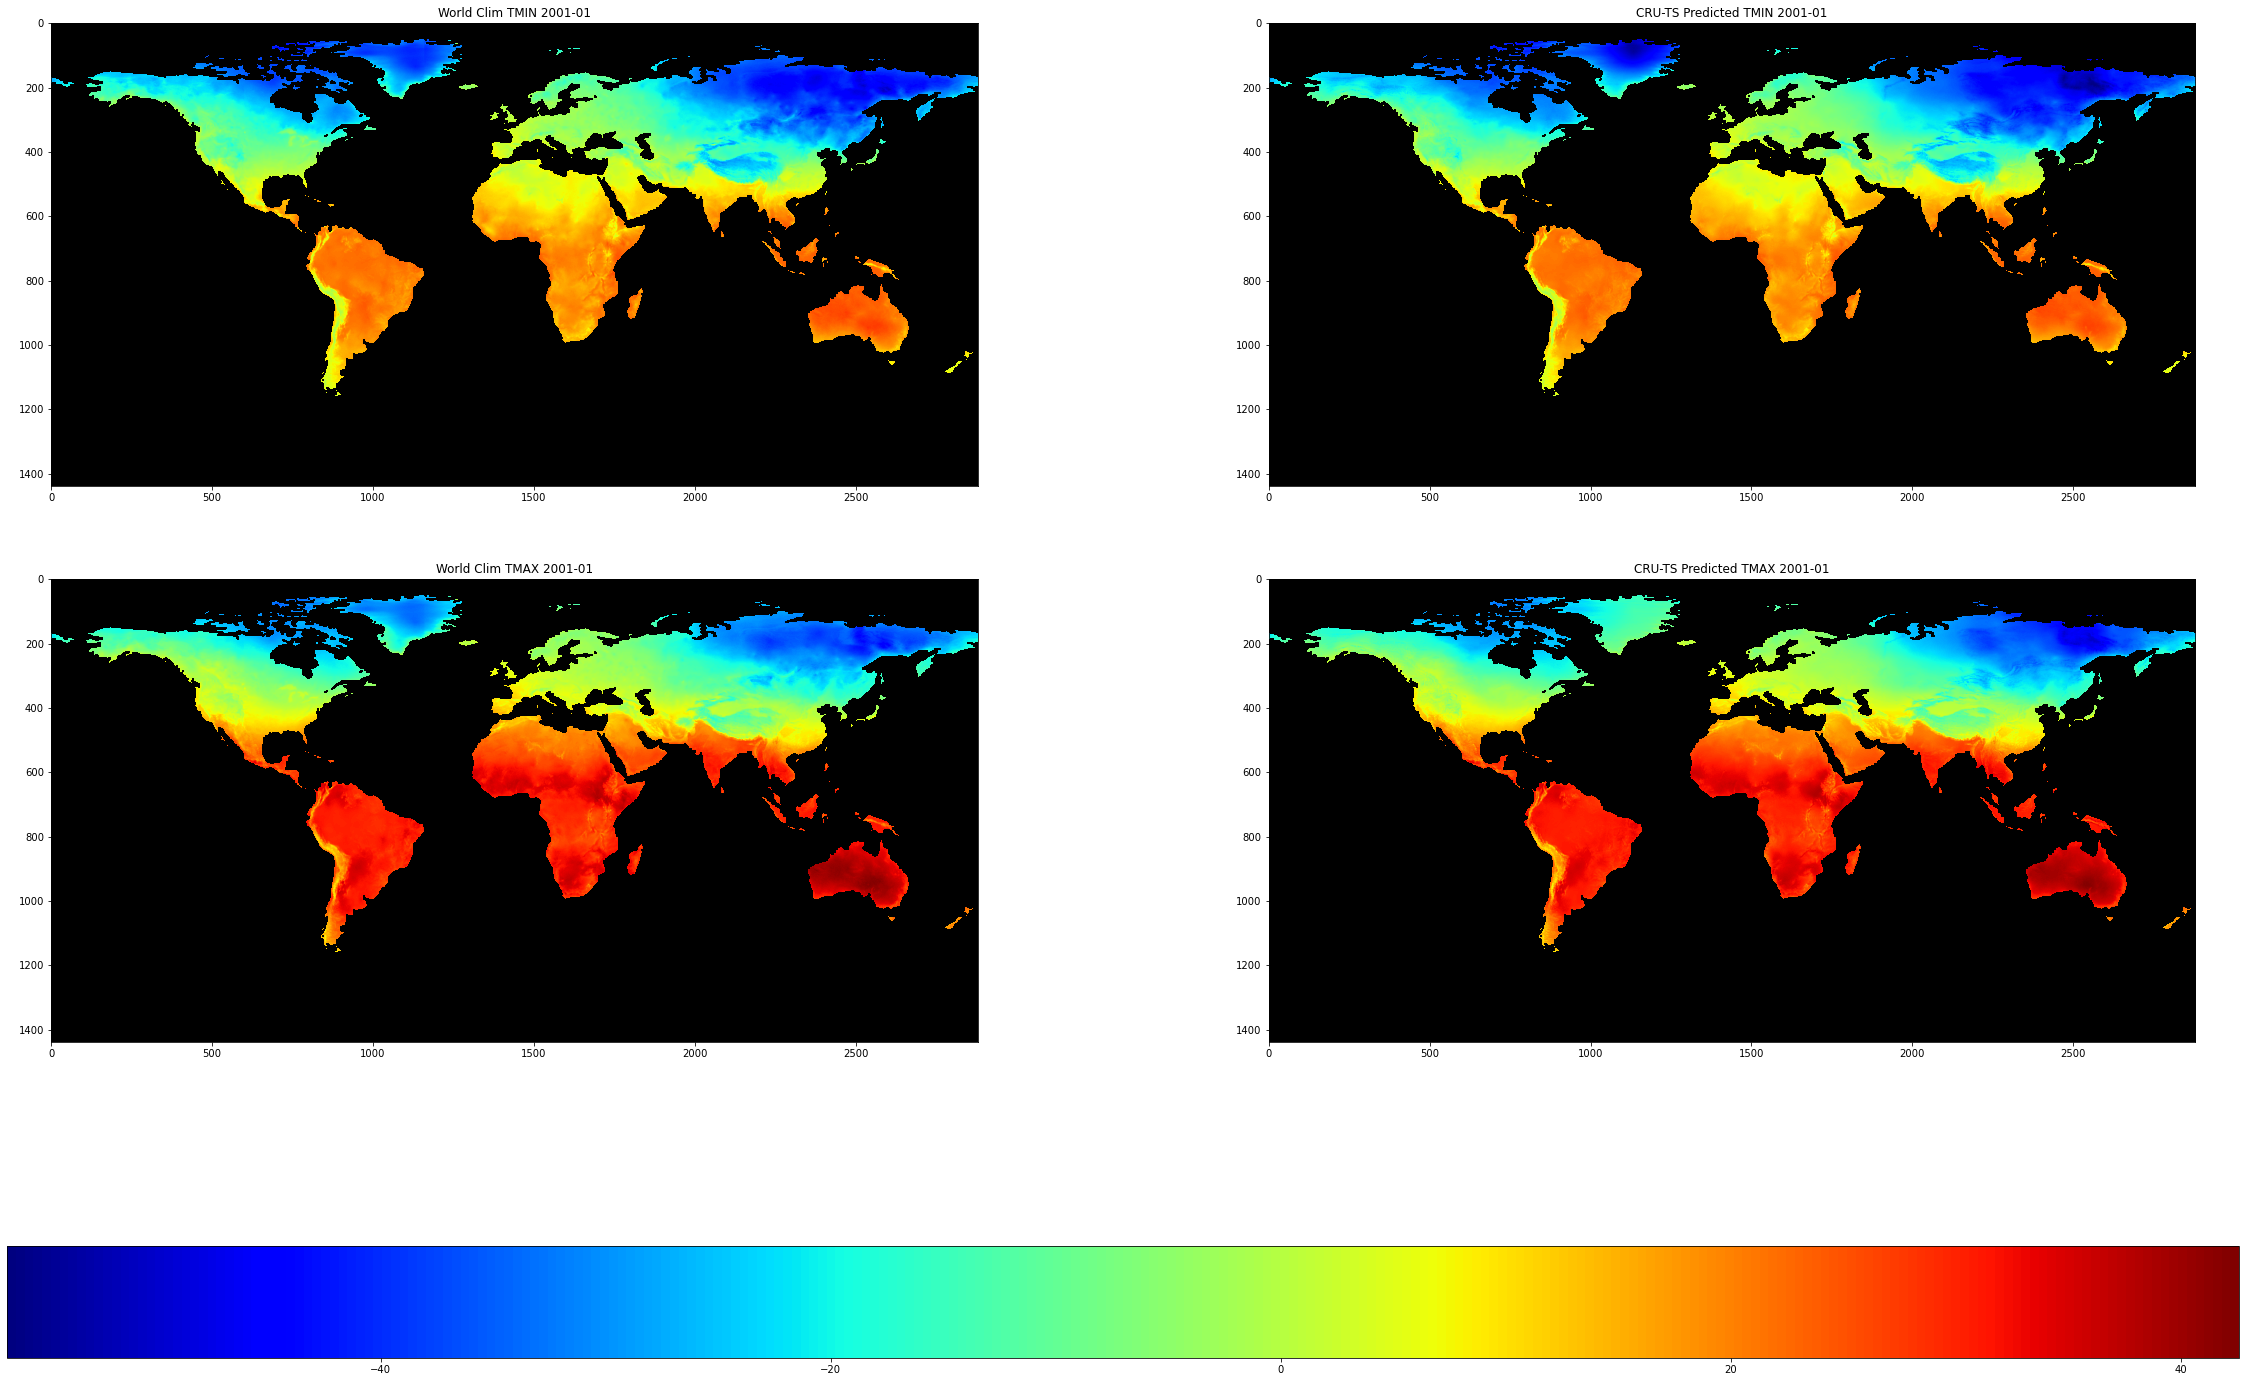

In [13]:
fig, axs = plt.subplots(2, 2, figsize=(40, 25))
images = []

cmap = matplotlib.cm.jet.copy()
cmap.set_bad("black", 1.0)

images.append(axs[0][0].imshow(wc_tmn, cmap=cmap))
axs[0][0].set_title("World Clim TMIN 2001-01")

images.append(axs[0][1].imshow(cruts_tmn, cmap=cmap))
axs[0][1].set_title("CRU-TS Predicted TMIN 2001-01")

images.append(axs[1][0].imshow(wc_tmx, cmap=cmap))
axs[1][0].set_title("World Clim TMAX 2001-01")

images.append(axs[1][1].imshow(cruts_tmx, cmap=cmap))
axs[1][1].set_title("CRU-TS Predicted TMAX 2001-01")

# Find the min and max of all colors for use in setting the color scale.
vmin = min(image.get_array().min() for image in images)
vmax = max(image.get_array().max() for image in images)
norm = colors.Normalize(vmin=vmin, vmax=vmax)
for im in images:
    im.set_norm(norm)


fig.colorbar(images[0], ax=axs, orientation="horizontal", fraction=0.1)


# Make images respond to changes in the norm of other images (e.g. via the
# "edit axis, curves and images parameters" GUI on Qt), but be careful not to
# recurse infinitely!
def update(changed_image):
    for im in images:
        if (
            changed_image.get_cmap() != im.get_cmap()
            or changed_image.get_clim() != im.get_clim()
        ):
            im.set_cmap(changed_image.get_cmap())
            im.set_clim(changed_image.get_clim())


for im in images:
    im.callbacksSM.connect("changed", update)

plt.show()